In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import tweepy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [2]:
consumer_key = <enter your key>
consumer_secret = <enter your secret key>
access_token = <enter access token>
access_token_secret = <enter access_token_secret>
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
def getData():


    raw_tweets=[]

    for tweet in tweepy.Cursor(api.search, '@imVkohli', lang="en").items(500):
        

        raw_tweets.append(tweet.text)

    return raw_tweets

In [4]:

tweets=getData()

In [5]:
print(len(tweets))

500


In [6]:
raw_string = ''.join(tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [7]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]
words = [w for w in words if w not in ('imvkohli','virat','kohli')]

In [8]:
words

['abhishkjntrmnt',
 'iplauction',
 'want',
 'playplay',
 'hardest',
 'match',
 'life',
 'choosing',
 'play',
 'god',
 'amp',
 'devilas',
 'nowsivavkohli',
 'cricbuzz',
 'joybhattacharj',
 'gauravkapur',
 'rcbtweets',
 'said',
 'cant',
 'select',
 'best',
 'xibut',
 'paine',
 'murali',
 'vijay',
 'stump',
 'mic',
 'know',
 'hes',
 'captain',
 'cant',
 'seriously',
 'bloke',
 'bhuvanbagga',
 'good',
 'piece',
 'dissecting',
 'one',
 'glaring',
 'shortcoming',
 'captaincy',
 'indias',
 'current',
 'best',
 'batsman',
 'without',
 'smith',
 'warner',
 'loosing',
 'means',
 'cant',
 'win',
 'rounder',
 'bat',
 'know',
 'favourite',
 'ipl',
 'teamfull',
 'team',
 'royal',
 'challengers',
 'bangaloreiplauction',
 'iplauction',
 'ipl',
 'vineshkumar',
 'happynewyearwednesdaywisdomis',
 'god',
 'form',
 'formless',
 'identity',
 'complete',
 'saint',
 'will',
 'attbishanbedi',
 'gentlemans',
 'gamert',
 'sanjayuvacha',
 'say',
 'batting',
 'excuses',
 'bad',
 'behavior',
 'mostly',
 'say',
 'na

In [23]:
mask = np.array(Image.open('/home/sachin/Downloads/bat.png'))

In [24]:
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)

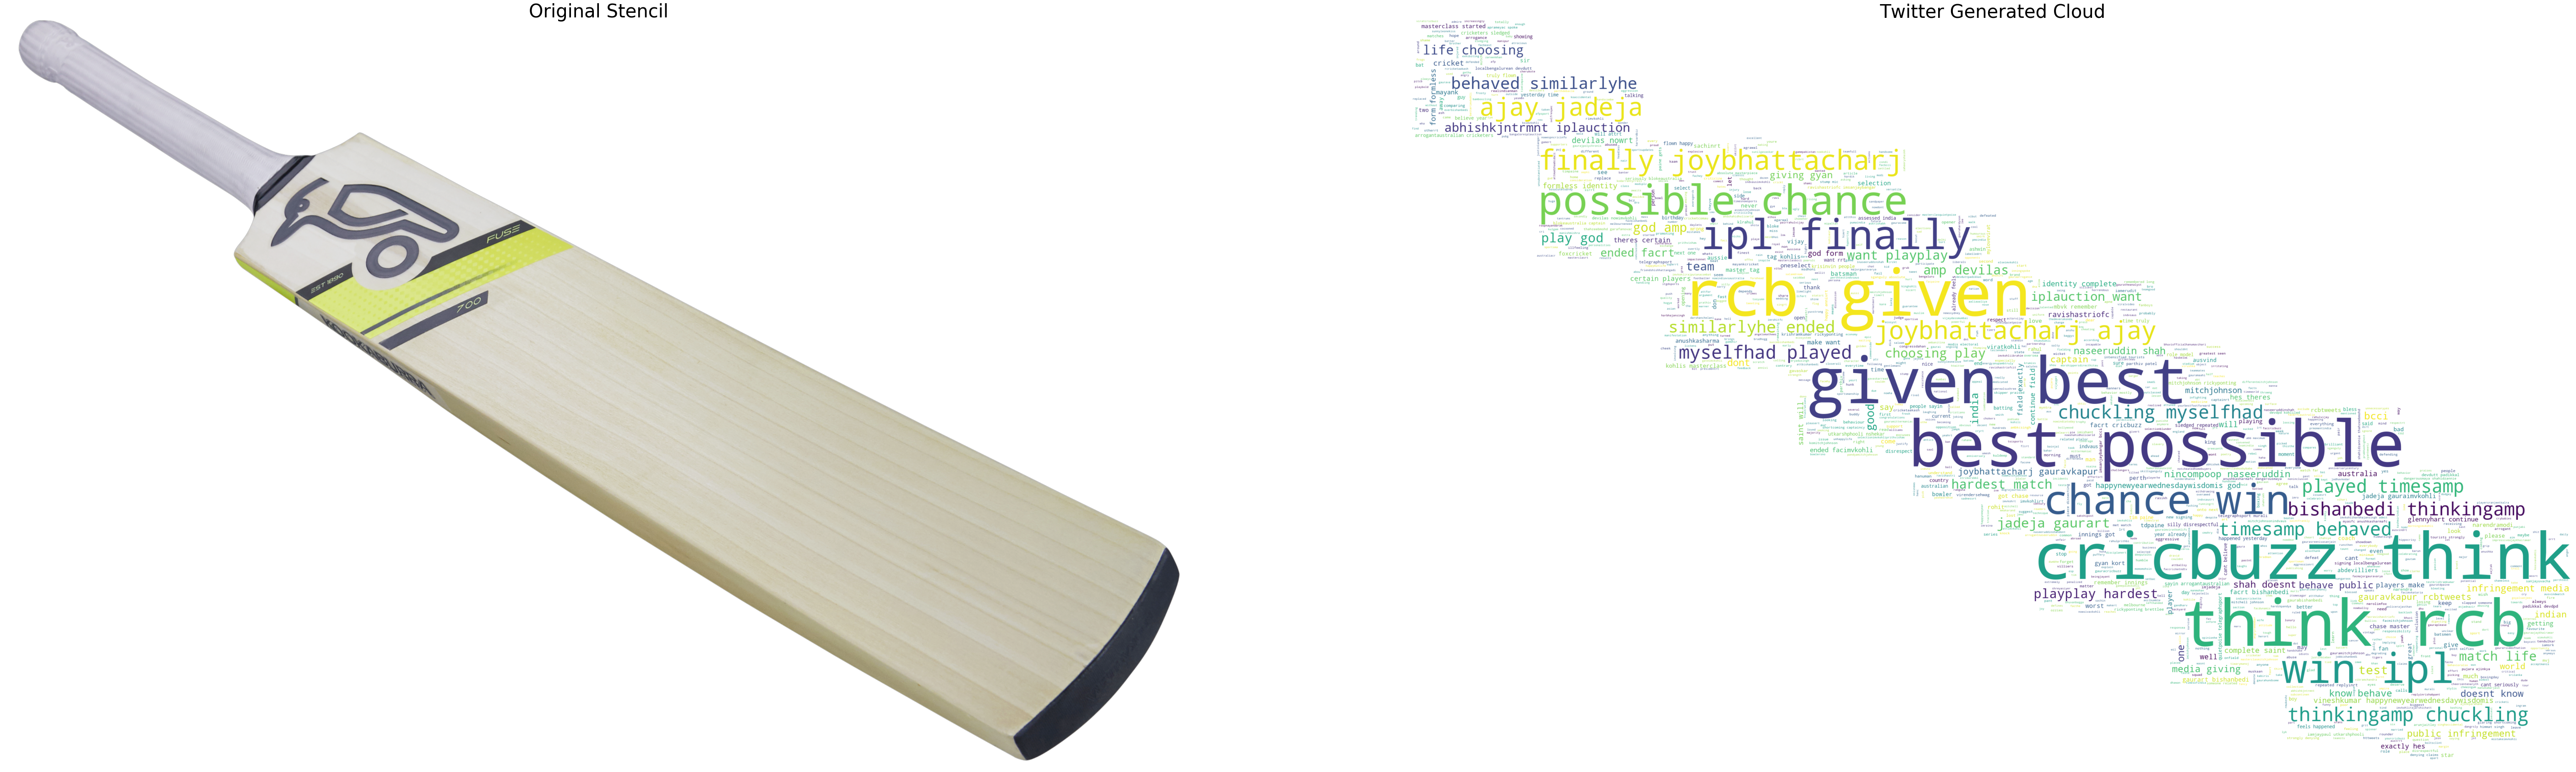

In [25]:
f = plt.figure(figsize=(100,100))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()